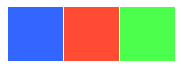

In [120]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

import time
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings("ignore")

flatui = [(0.2,0.4,1), (1,0.3,0.2), (0.3,1,0.3)]
sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)

In [3]:
base_path = 'D:/DataSet/Credit/'
train = pd.read_csv(base_path + 'featured/train_all_feature_log.csv')
test = pd.read_csv(base_path + 'featured/test_all_feature_log.csv')

one_hot = 0
if one_hot:
    train = pd.get_dummies(train)
    test = pd.get_dummies(test)
    
col_to_drop = [
    # 1
    'count_house_loan_ln',# 0.97232912500359225)
    'count_house_loan',# 0.65395611105534779)
    'edu_level_other',# 0.57350198625873861)
    'count_payment_state_E_ln',# 0.51044888053676218)
    'count_attention_ln',# 0.32350891467937332)
    'count_commercial_loan',# 0.0)
    'count_sixty_ovd_dw',# 0.0)
    'count_sixty_ovd_months',# 0.0)
    'ind_sixty_max_duration',# 0.0)
    'marry_status_other',# 0.0)
    'count_study_loan_ln',# 0.0)
    'count_housing_accumulation_ln',# 0.0)
    'count_commercial_housing_ln',# 0.0)
    'count_combination_ensure_ln',# 0.0)
    'ind_other_counts_lnd',# 0.0)
    'count_combination_lnd',# 0.0)
    'count_pledge_guarantee_lnd',# 0.0)
    'count_ensure_lnd',# 0.0)
    'count_other_guarantee_lnd',# 0.0)
    'count_combination_ensure_lnd',# 0.0)
    'count_farmer_joint_lnd',# 0.0)
    'count_pledge_guarantee_bail_lnd',# 0.0)
    # 10
    'ind_curr_overdue_cyc_lnd',# 9.1747017468829988)
    'ind_unact_counts_lnd',# 8.1829607049772104)
    'ind_other_counts',# 8.1190294047611253)
    'count_pledge_guarantee_bail_ln',# 4.9866824922417035)
    'count_sharedebt',# 4.25470982342895)
    'marry_status_unmarried',# 3.5268450817329375)
    'count_normal_ln',# 3.1544560288384238)
    'count_farmer_joint_ln',# 2.8250789765495536)
    'not_clear_account_count',# 2.438362051462843)
    'count_car_loan_ln',# 2.0244134983035815)
    'count_payment_state_E_lnd',# 1.9511014375106948)
    # 40
    'ind_normal_counts',# 38.981578298058366)
    'count_ensure_ln',# 32.686012781155711)
    'not_logout_pre_account_count',# 29.035934862113912)
    'count_spl',# 26.621401271906876)
    'not_logout_pre_finance_org_count',# 20.88833411697636)
    'count_debit_card_ovd_dw',# 20.552771641255653)
    'ind_clear_counts_lnd',# 18.63633007759838)
    'cat_query_reason_mal',# 18.012892273855371)
    'count_other_guarantee_ln',# 15.719418555370231)
    'count_pledge_guarantee_ln',# 14.603172531948651)
    'count_standard_loancard',# 14.257967916620288)
    'count_combination_ln',# 13.225866749150008)
    'marry_status_divorced',# 12.996673186745294)
    'flt_highest_sixty_oa_per_mon',# 12.496437876453976)
    'count_farmer_loan_ln',# 12.034259912867824)
    # 60
    'curr_overdue_cyc_days',# 58.533138767951407)
    'not_logout_pre_max_credit_limit_per_org',# 55.545770066417433)
    'not_logout_pre_finance_corp_count',# 54.909995520093744)
    'has_fund',# 53.524477466077244)
    'edu_level_bachelor',# 51.681921368379456)
    'cat_query_reason_sqe',# 50.507370364531575)
    'not_clear_finance_org_count',# 50.499752342403504)
    'count_payment_state_B_ln',# 49.675949679726415)
    'count_ovd',# 47.284280675138668)
    'marry_status_married',# 47.141063732728689)
    # 100
    'count_payment_state_D_ln',# 98.582591891500016)
    'not_logout_finance_org_count',# 97.63379220401383)
    'count_credit_loan_ln',# 96.057688729626022)
    'count_payment_state_D_lnd',# 94.52677681813546)
    'all_highest_oa_per_mon',# 93.758390716396264)
    'count_consumption loan_ln',# 92.34403542313882)
    'not_logout_pre_latest_6m_used_avg_amount',# 85.357040829001591)
    'balance',# 85.186190705260103)
    'cat_query_reason_la',# 83.737758346562558)
    'ind_clear_counts',# 82.467554392775014)
    'count_unknown_ln',# 73.400641666623201)
    'not_logout_pre_min_credit_limit_per_org',# 70.752886069309909)
    'not_logout_pre_credit_limit',# 68.394379619115668)
    'not_logout_account_count',# 67.926934887483739)
    'lnd_ovd_sum_amount',# 67.598474433716945)
    'flt_highest_debit_card_oa_per_mon',# 64.9057845815354)
    'count_loan_ovd_dw',# 64.132474960621153)
    'count_operating_loan_ln',# 63.127772355688421)
    'not_clear_finance_corp_count',# 62.877948676798582)
    # 180
    'not_logout_latest_6m_used_avg_amount',# 176.32317263727683)
    'ind_loan_max_duration',# 167.56724876084013)
    'count_credit_loan_lnd',# 166.96045957856194)
    'all_max_duration',# 153.57957111737943)
    'not_clear_balance',# 153.18548993022915)
    'flt_highest_loan_oa_per_mon',# 150.5264464131252)
    'flt_sum_amount',# 149.83162201460962)
    'used_highest_amount_lnd',# 136.85598322859255)
    'scheduled_payment_amount',# 128.02030046387119)
    'latest6_month_used_avg_amount_lnd',# 124.58135686300396)
    'ind_org_counts',# 120.5490321578975)
    'ind_debit_card_max_duration',# 118.53218655429413)
    'edu_level_junior',# 117.02178169627837)
    'lnd_ovd_sum_last_months',# 114.74345491704378)
    'used_credit_limit_amount_lnd',# 114.2672848868574)
    'ave_ovd_amount',# 114.06571798355444)
    'count_other_loan',# 111.82596886962884)
    'range_lnd_ovd',# 109.13363916690426)
    'not_logout_pre_used_credit_limit',# 105.64340446411771)
    'count_sum_ovd_dw',# 104.97563024241767)
    # flt_noise
    'not_logout_max_credit_limit_per_org',# 211.80030432198566)
    # 240
    #'not_logout_finance_corp_count',# 217.97120979038462)
]

train = train.drop(col_to_drop, axis=1)
test = test.drop(col_to_drop,axis=1)

In [32]:
len(np.unique(train['not_clear_latest_6m_used_avg_amount']))

6870

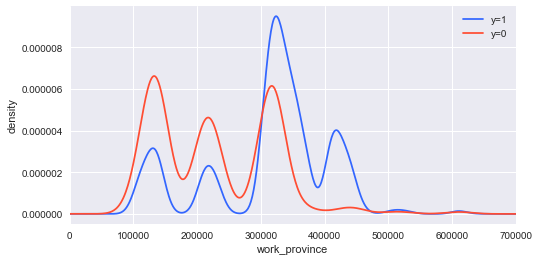

In [139]:
fig = plt.figure()
fig.set(alpha=0.2)
fig.set_size_inches(8, 4)

plt.subplot2grid((1,2), (0,0), colspan=2)
train.work_province[train.y == 0].plot(kind='kde')
train.work_province[train.y == 1].plot(kind='kde')
plt.legend(['y=1', 'y=0'], loc='best')
plt.xlabel(u'work_province')
plt.ylabel(u'density')
plt.xlim(0, 700000)

plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

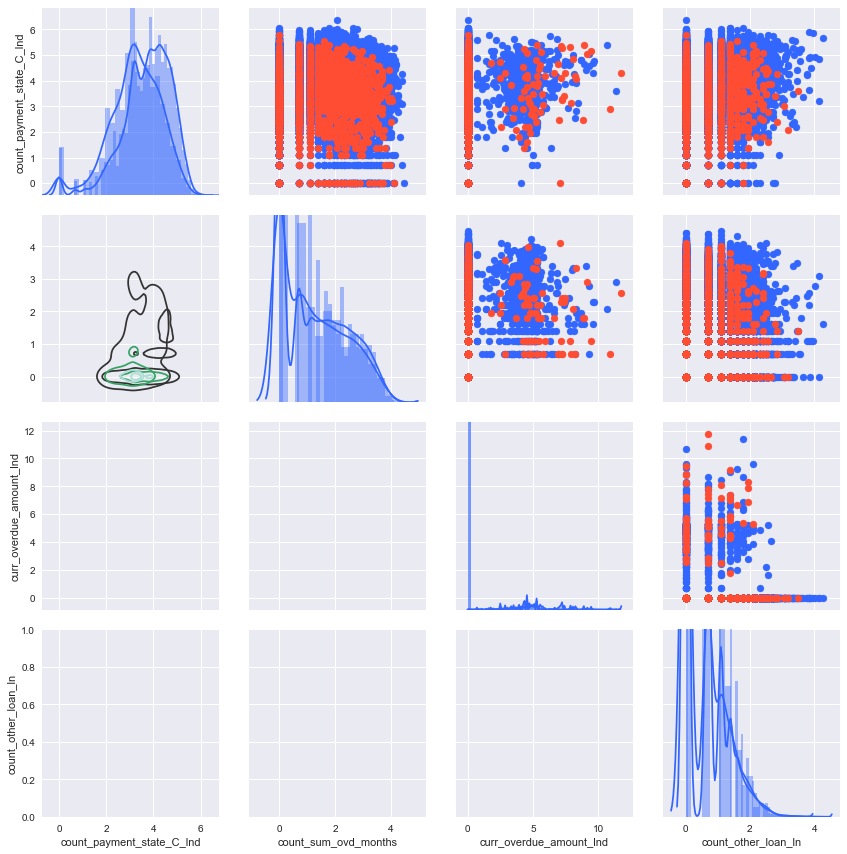

In [166]:
scatters = [
    'y',
    'count_payment_state_C_lnd',# 344
    #'actual_payment_amount_lnd',# 18821
    #'credit_limit_amount_lnd',# 20103
    #'share_credit_limit_amount_lnd',# 7774
    'count_sum_ovd_months',# 74
    'curr_overdue_amount_lnd',# 297
    'count_other_loan_ln',# 47
] 

# scatters = [
#     'y',
#     'credit_limit_amount',# 16269
#     'not_clear_latest_6m_used_avg_amount',# 6870
#     'not_clear_credit_limit',# 12053
#     'actual_payment_amount',# 8192 
# ] 

temp = train[scatters]
temp.y[temp.y == 1] = 'pos'
temp.y[temp.y == 0] = 'neg'

g = sns.PairGrid(temp,hue='y',size=3)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot,n_levels=3)
g.add_legend()

plt.show()

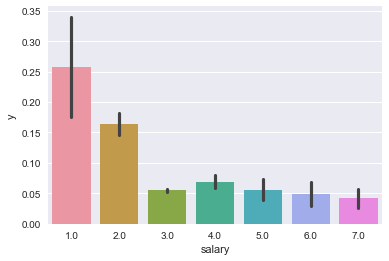

In [165]:

#sns.barplot(x="is_local", y="y", data=train);
#sns.barplot(x="agent", y="y", data=train);
#sns.barplot(x="edu_level_under", y="y", data=train);
sns.barplot(x="salary", y="y", data=train);

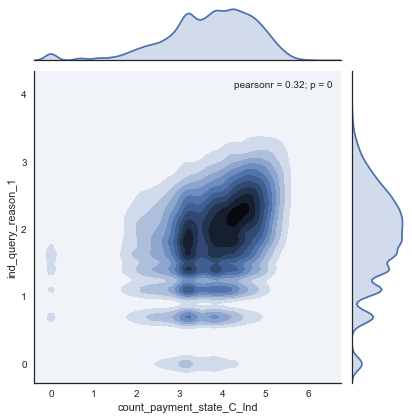

In [51]:
sns.jointplot("count_payment_state_C_lnd", "ind_query_reason_1",  data=train, kind="kde")
plt.show()

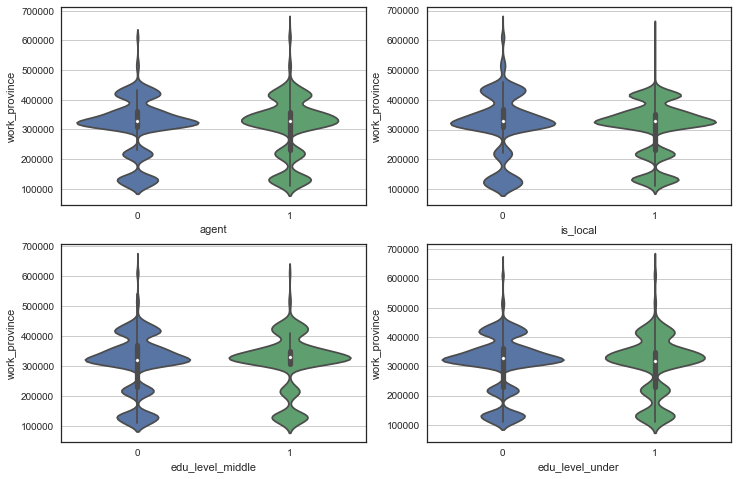

In [98]:
X=train

fig = plt.figure()
fig.set(alpha=0.2)
fig.set_size_inches(12, 8)

plt.subplot2grid((2,2), (0,0))
sns.violinplot(x="agent", y="work_province", data=X, size=6) 
plt.xlabel(u'agent')
plt.grid(b=True, axis='y', which='major')

plt.subplot2grid((2,2), (0,1))
sns.violinplot(x="is_local", y="work_province", data=X, size=6) 
plt.xlabel(u'is_local')
plt.grid(b=True, axis='y', which='major')

plt.subplot2grid((2,2), (1,0))
sns.violinplot(x="edu_level_middle", y="work_province", data=X, size=6) 
plt.xlabel(u'edu_level_middle')
plt.grid(b=True, axis='y', which='major')

plt.subplot2grid((2,2), (1,1))
sns.violinplot(x="edu_level_under", y="work_province", data=X, size=6) 
plt.xlabel(u'edu_level_under')
plt.grid(b=True, axis='y', which='major')
#plt.ylabel(u'work_province')

plt.show()

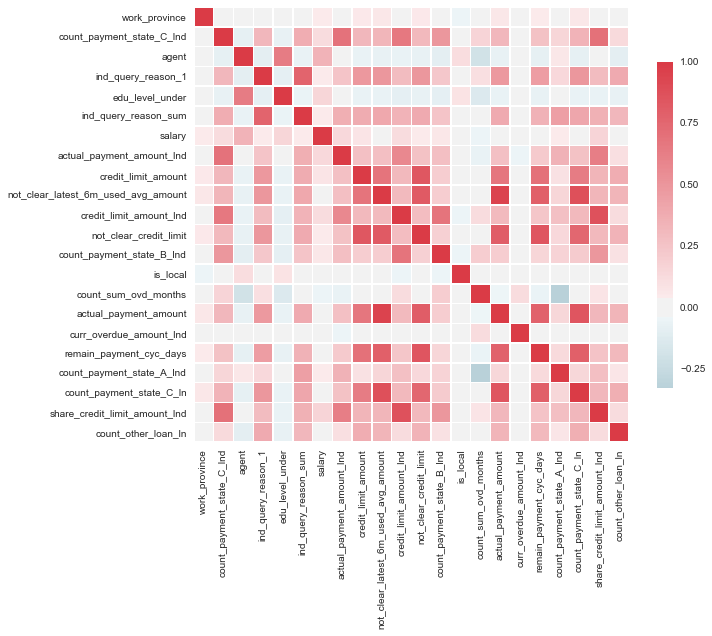

In [15]:
temp = train[feature_import]

fig = plt.figure()
fig.set_size_inches(10,8)

sns.set(style="white")
corr = temp.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=False, cbar_kws={"shrink": .75})

plt.show()

In [16]:
feature_import = [
    'y',
    'work_province',# 285
    'count_payment_state_C_lnd',# 344
    'agent',# 2
    'ind_query_reason_1',# 47
    'edu_level_under',# 2
    'ind_query_reason_sum',# 84
    'salary',# 7
    'actual_payment_amount_lnd',# 18821
    'credit_limit_amount',# 16269
    'not_clear_latest_6m_used_avg_amount',# 6870
    'credit_limit_amount_lnd',# 20103
    'not_clear_credit_limit',# 12053
    'count_payment_state_B_lnd',# 393
    'is_local',# 2
    'count_sum_ovd_months',# 74
    'actual_payment_amount',# 8192 
    'curr_overdue_amount_lnd',# 297
    'remain_payment_cyc_days',# 950
    'count_payment_state_A_lnd',# 327
    'count_payment_state_C_ln',# 219
    'share_credit_limit_amount_lnd',# 7774
    'count_other_loan_ln',# 47
] 
    
feature_bin = [
    'agent',
    'is_local',
    'edu_level_middle',
    'edu_level_under',
]


feature_900 = [
    'work_province',# 285
    'count_payment_state_C_lnd',# 344
    'actual_payment_amount_lnd',# 18821
    'credit_limit_amount',# 16269
    'not_clear_latest_6m_used_avg_amount',# 6870
    'credit_limit_amount_lnd',# 20103
    'not_clear_credit_limit',# 12053
    'count_payment_state_B_lnd',# 393
    'actual_payment_amount',# 8192 
    'curr_overdue_amount_lnd',# 297
    'remain_payment_cyc_days',# 950
    'count_payment_state_A_lnd',# 327
    'count_payment_state_C_ln',# 219
    'share_credit_limit_amount_lnd',# 7774
]